# File I/O
You can read data from files normally with Pyhton I/O functions, but Numpy has some useful alternatives. If you have a formatted text file (.txt, .csv, .dat, etc...) you can use `genfromtxt()` to read it into a numpy array. To save an array to a text file, you use `savetxt()`
```
data = genfromtxt('input_data.csv') # to read data
savetxt('output.dat',data,[format]) # to save data on file
```
Numpy also has its own binary file format `.npy` to store arrays (similar to Matlab `.mat`)
```
data = random.rand(10,5)
save('random_data.npy') # save to file
new_data = load('random_data.npy') # load file
```
with `save` you can only store one array per file. If you need to save multiple arrays, you can use `savez`, which will save them in an uncompressed .npz file. It is basically a zip file containing multiple .npy files [(more info)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html)

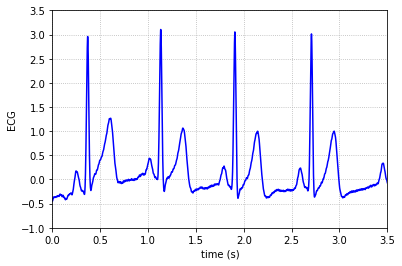

In [39]:
# Example, load an ECG signal contained in a .txt file
import numpy as np
from matplotlib import pyplot as plt

ecg = np.genfromtxt('ecg.txt')
dt = ecg[0] # the first value is the time step
ecg = ecg[1:]
x = np.linspace(0,dt*(len(ecg)-1),len(ecg)) # generate time axis

# Plotting
plt.plot(x,ecg,'-b',linewidth=1.5)
plt.grid(True,which='both',linestyle=':')
plt.xlim([0,3.5])
plt.ylim([-1,3.5])
plt.xlabel('time (s)')
plt.ylabel('ECG')
plt.show(block=False)